In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
movies=pd.read_csv("Movies.csv",engine="python")

In [3]:
movies

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Wednesday,William Friedkin,horror,The Exorcist,26/12/1973,WB,"2,363.60",12.0,441.3,6.9,3.39,208.4,47.2,429.3,3577.5,122,232.9,52.8
604,Wednesday,George Lucas,action,Star Wars,25/05/1977,Fox,"3,042.80",11.0,775.4,8.7,4.19,314.4,40.5,764.4,6949.1,121,461.0,59.5
605,Friday,James Cameron,sci-fi,Avatar,18/12/2009,Fox,"3,090.40",237.0,"2,788",7.9,3.78,"2,027.50",72.7,"2,551",1076.4,162,760.5,27.3
606,Wednesday,James Cameron,drama,Titanic,17/12/1997,Paramount Pictures,"3,240.10",200.0,"2,186.80",7.7,3.38,"1,528.10",69.9,"1,986.80",993.4,194,658.7,30.1


In [4]:
movies.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [5]:
movies.columns=['Day', 'Director', 'Genre', 'Movie', 'ReleaseDate',
       'Studio', 'AdjustedGross', 'Budget', 'Gross',
       'IMDbRating', 'MovieLensRating', 'Overseas', 'Overseas_p',
       'Profit', 'Profit_p', 'Runtime', 'US',
       'US_p']

In [6]:
filter1= (movies.Genre=='comedy') | (movies.Genre=='action') | (movies.Genre=='adventure') | (movies.Genre=='animation') | (movies.Genre=='drama')
filter2= (movies.Studio=='Sony') | (movies.Studio=='Fox') | (movies.Studio=='Universal') | (movies.Studio=='WB') | (movies.Studio=='Paramount Pictures') | (movies.Studio=='Buena Vista Studios')
filter3= filter1 & filter2
movies_selected=movies[filter3]

In [7]:
movies_selected.Day=movies_selected.Day.astype('category')
movies_selected.Director=movies_selected.Director.astype('category')
movies_selected.Genre=movies_selected.Genre.astype('category')
movies_selected.Studio=movies_selected.Studio.astype('category')
movies_selected.Gross=movies_selected.Gross.str.replace(',', '').astype(float)
movies_selected.Overseas =movies_selected.Overseas.str.replace(',', '').astype(float)
movies_selected.Profit=movies_selected.Profit.str.replace(',', '').astype(float)
movies_selected.AdjustedGross=movies_selected.AdjustedGross.str.replace(',', '').astype(float)
print(movies.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              608 non-null    object 
 1   Director         608 non-null    object 
 2   Genre            608 non-null    object 
 3   Movie            608 non-null    object 
 4   ReleaseDate      608 non-null    object 
 5   Studio           608 non-null    object 
 6   AdjustedGross    608 non-null    object 
 7   Budget           608 non-null    float64
 8   Gross            608 non-null    object 
 9   IMDbRating       608 non-null    float64
 10  MovieLensRating  608 non-null    float64
 11  Overseas         608 non-null    object 
 12  Overseas_p       608 non-null    float64
 13  Profit           608 non-null    object 
 14  Profit_p         608 non-null    float64
 15  Runtime          608 non-null    int64  
 16  US               608 non-null    float64
 17  US_p            

AttributeError: 'AxesSubplot' object has no attribute 'Genre'

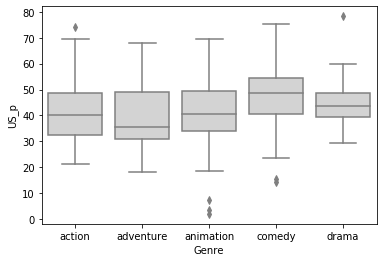

In [8]:

vis1=sns.boxplot(data=movies_selected,x='Genre',y='US_p',color='lightgray')
plt.setp(vis1.Genre,aplha=0.5)
#vis1=sns.lmplot(data=movies_selected,x='Genre',y='US_p',)
vis1=sns.stripplot(data=movies_selected,x='Genre',y='US_p',hue="Studio",jitter=True,size=6)

In [9]:
movies_selected

,Day,Director,Genre,Movie,ReleaseDate,Studio,AdjustedGross,Budget,Gross,IMDbRating,MovieLensRating,Overseas,Overseas_p,Profit,Profit_p,Runtime,US,US_p
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126.0,59.5,131.8,164.8,134,85.8,40.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Friday,Steven Spielberg,adventure,Jurassic Park,11/06/1993,Universal,1693.8,63.0,1029.2,8.1,3.66,626.7,60.9,966.2,1533.7,127,402.5,39.1
600,Friday,Steven Spielberg,adventure,E.T.: The Extra-Terrestrial,11/06/1982,Universal,1953.9,10.5,792.9,7.9,3.76,357.8,45.1,782.4,7451.4,115,435.1,54.9
602,Tuesday,Richard Fleischer,adventure,Doctor Dolittle,19/12/1967,Fox,2096.8,70.5,294.5,5.3,3.01,150.3,51.0,224.0,317.7,152,144.2,49.0
604,Wednesday,George Lucas,action,Star Wars,25/05/1977,Fox,3042.8,11.0,775.4,8.7,4.19,314.4,40.5,764.4,6949.1,121,461.0,59.5
